## **Inaugural Project**

## Tabel of Contents

- [Imports](#imports)
- [Question 1: illustrating the Edgeworth box  and pareto improvements](#question-1)
- [Question 2: calculating the (error) excess demand](#question-2)
- [Question 3: finding the market clearing price](#question-3)
- Question 4: finding allocation of resources
    - [Question 4a: with discrete price](#question-4a)
    - [Question 4b: with continous price](#question-4b)
- Question 5: finding allocation of resources
  - [Question 5a: restricted to C](#question-5a)
  - [Question 5b: no further restrictions](#question-5b)
- Question 6: resource allocation with social planner
  - [Question 6a: finding the allocation](#question-6a)
  - [Question 6b: comparing with question 3-5](#question-6b)
- [Question 7: draw a random set (W)](#question-7)
- [Question 8: find market allocation for initial endowments in W](#question-8)


In this project, we analyze an exchange economy model with two consumers (A and B) and two goods (x1 and x2). We begin by illustrating the set of Pareto improvements in an Edgeworth box and proceed to solve various optimization problems to find market-clearing prices and allocations that maximize utility under different constraints. Finally, we consider random initial endowments and analyze the resulting market equilibrium allocations.

### **Imports**

In [15]:
# Autoreload modules when code is run. Otherwise python will not reload the modules and changes will not be effective.
%load_ext autoreload
%autoreload 2

# Import packages used in the project
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.30","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 12})

# Import the class from the module
from inauguralproject import EdgeworthBoxClass 

# Set the parameters for alpha and beta and the initial endowments for consumer A and B.
alpha = 1/3
beta = 2/3
endowment_A = [0.8, 0.3]
endowment_B = [1 - e for e in endowment_A]
p1_values = np.linspace(0.5, 2.5, 75)  # Define the range for where p1 is defined initially.  


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Question 1**


In this exercise, we illustrate the set of Pareto improvements in an Edgeworth box. The Pareto improvements are combinations of allocations that leave both consumers at least as well off as their initial endowments.

We solve this exercise in the following steps:

1. Define the model parameters
2. Create utility functions
3. Establish demand functions
4. Compute initial utilities
5. Settings for figure
6. Plot the endowment
7. Plot the Edgeworth box and the Pareto improvements

The figure above shows the Edgeworth box with the initial endowment and the set of Pareto improvements. Each blue point represents an allocation that is a Pareto improvement, indicating both consumers are at least as well off as their initial endowments.

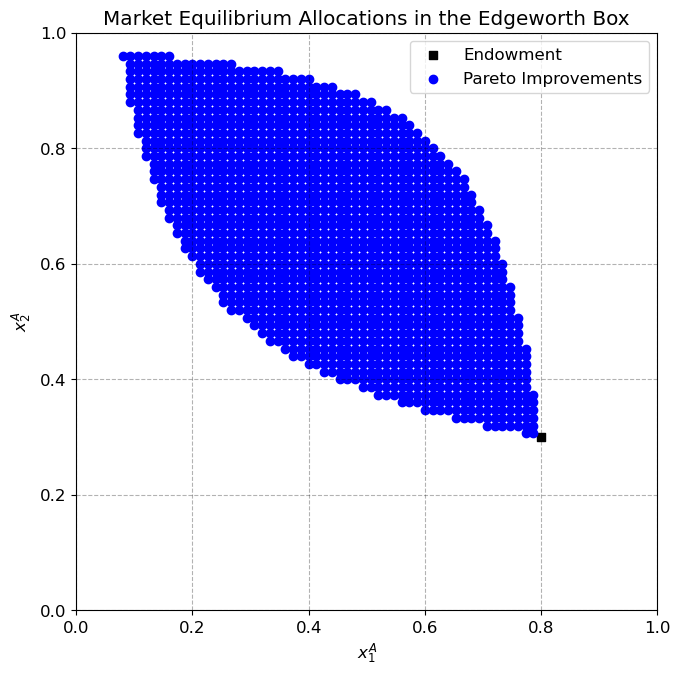

In [16]:
# Creates the EdgeworthBoxClass 
box = EdgeworthBoxClass(alpha, beta, endowment_A)

# Plot the Edgeworth box
box.plot_edgeworth_box()

### **Question 2**

In the market equilibrium we have demand equal to supply at the market clearing price p1*. However, if the price is not equal to p1* there we be an excess demand, which is measured by epsilon1 and epsilon2 on the market for good 1 and good 2. We find the excess demand for a variety of prices – which is known as the “error in the market clearing condition”. We make a graph to visualize the error. When the price of good 1 goes up we find the excess demand goes down. When it becomes negative, we have a excess supply. Inversely, when the price of good 1 goes up we see the excess demand for good 2 goes up as the consumers substitute towards this good that now becomes relatively cheaper. Furthermore, it is important to look at the intersection between the excess demand of good 1 and 2, which will be the market clearing price that we will also find in question 3. Naturally, this intersection happens at the point where points excess demands are equal to 0 – since this must be true in the equilibrium. 

We solve this exercise in the following steps:

1. Define the function to calculate market clearing errors
2. Define the function to plot market clearing errors
3. Set the range for p1
4. Plot the market clearing errors
5. Calculate and print the first 5 errors

The plot of market clearing errors shows how the errors for both goods 1 and 2 vary with changes in the price p1. For good 1, the error starts positive and decreases as p_1 increases, indicating an initial excess demand that diminishes. Conversely, for good 2, the error starts negative and increases with p_1 , showing an initial excess supply that reduces. This behavior illustrates the adjustment process towards market equilibrium. The first five errors, detailed below the plot, reflect this trend and provide specific values for initial discrepancies in market clearing.

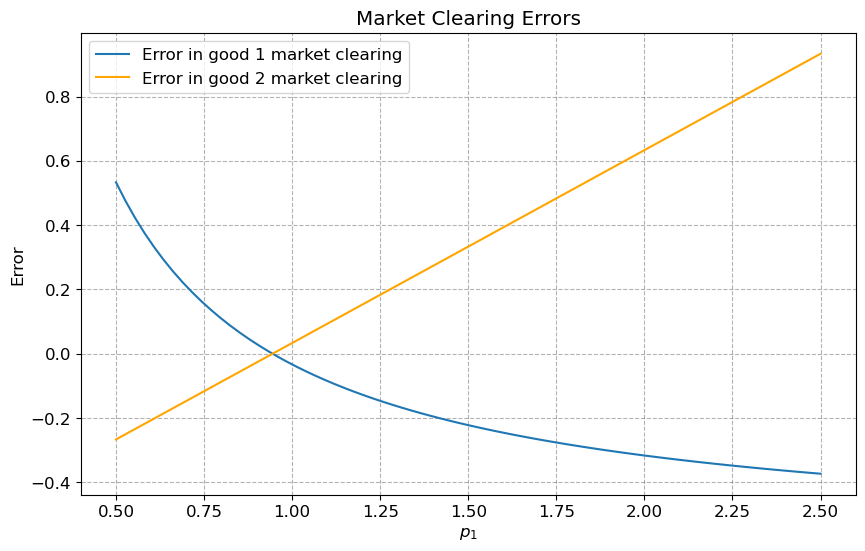

First 5 errors (p1, error in good 1, error in good 2):
p1: 0.50, error in good 1: 0.5333, error in good 2: -0.2667
p1: 0.53, error in good 1: 0.4752, error in good 2: -0.2505
p1: 0.55, error in good 1: 0.4228, error in good 2: -0.2342
p1: 0.58, error in good 1: 0.3752, error in good 2: -0.2180
p1: 0.61, error in good 1: 0.3319, error in good 2: -0.2018


In [17]:
# Define the range for p1
p1_values = np.linspace(0.5, 2.5, 75) 

# Plot the market claering errors
box.plot_market_clearing_errors(p1_values)

# Calculate and print the first 5 errors as an example
errors = box.market_clearing_errors(p1_values)
first_five_errors = errors[:5]
print("First 5 errors (p1, error in good 1, error in good 2):")
for error in first_five_errors:
    print(f"p1: {error[0]:.2f}, error in good 1: {error[1]:.4f}, error in good 2: {error[2]:.4f}")

# Question 3

To solve Question 3, we aim to find the market clearing price that equates the demand and supply for both goods. Here are the steps we follow:
1. Define a function to calculate the market claring error 
2. Find the market clearing price #Use the 'minimize_sclar' function 
3. Determine allocations at the market claring price

We find the market clearing price, as we also mentioned in question 2 – where it can be seen at the graphical intersection between the two excess demands. The market clearing price for p1 is equal to 0,94. Therefore, the relative price of p1/p2 is also equal to 0,94 since we have set p2 numerarie (p2=1). 
This yield to the allocation: For person A: (0,37, 0,70) and for persoin B: (0,63, 0,30) of (Good 1, Good 2)

In [18]:
# Defining the Edgeworth box with the initial parameters
edgeworth_box = EdgeworthBoxClass(alpha, beta, endowment_A)

# Find the market clearing price
market_clearing_price, error = edgeworth_box.find_market_clearing_price()

# Find the allocations at the market clearing price
allocation_A, allocation_B = edgeworth_box.allocation_at_price(market_clearing_price)

print(f"Market clearing price p1: {market_clearing_price:.3f}") 
print(f"Allocation for person A: Good 1: {allocation_A[0]:.3f}, Good 2: {allocation_A[1]:.3f}")
print(f"Allocation for person B: Good 1: {allocation_B[0]:.3f}, Good 2: {allocation_B[1]:.3f}")

Market clearing price p1: 0.944
Allocation for person A: Good 1: 0.373, Good 2: 0.704
Allocation for person B: Good 1: 0.627, Good 2: 0.296


# Question 4.a

In Question 4.a. we aim to maximize the utility for consumer A with the restriction that prices can only be chosen from a predefined set P_1. 

We solve this exercise in the following steps:
1. Define Initialize variables 
2. Iterate over p1 values
3. Calculate demands 
4. Check utility constraints 
5. Update maximum utility 
6. Return Results

We find that the restricted price p1 is 1.905. At this price, the optimal utility for consumer A is 0.634. The corresponding allocations are 0.622 units of Good 1 and 0.640 units of Good 2 for consumer A, and 0.378 units of Good 1 and 0.360 units of Good 2 for consumer B. This ensures that consumer B's utility is not worsened while maximizing the utility for consumer A.


In [19]:
# Initial utilities
initial_uA = edgeworth_box.u_A(endowment_A[0], endowment_A[1])
initial_uB = edgeworth_box.u_B(endowment_B[0], endowment_B[1])

# 4.a Maximize utility for A with restricted prices in P1
best_p1_restricted, max_utility_A_restricted, allocation_A_restricted, allocation_B_restricted = edgeworth_box.maximize_utility_A_restricted(p1_values)

if best_p1_restricted is not None:
    print(f"Restricted - Best p1: {best_p1_restricted:.3f}")
    print(f"Restricted - Optimal utility for A: {max_utility_A_restricted:.3f}")
    print(f"Restricted - Allocation for A: Good 1: {allocation_A_restricted[0]:.3f}, Good 2: {allocation_A_restricted[1]:.3f}")
    print(f"Restricted - Allocation for B: Good 1: {allocation_B_restricted[0]:.3f}, Good 2: {allocation_B_restricted[1]:.3f}")
else:
    print("Restricted optimization was unsuccessful.")


Restricted - Best p1: 1.905
Restricted - Optimal utility for A: 0.634
Restricted - Allocation for A: Good 1: 0.622, Good 2: 0.640
Restricted - Allocation for B: Good 1: 0.378, Good 2: 0.360


# Question 4.b

In Question 4.b, our goal is to maximize the utility for consumer A without imposing any restrictions on the prices. This allows consumer A to freely choose any positive price to achieve optimal utility.

We solve this problem through the following steps:
1. Define and initialize necessary variables
2. Apply optimization techniques to determine the best p1
3. Calculate demands for both goods
4. Ensure that consumer B's utility remains above the initial level
5. Update the maximum utility for A as needed
6. Return the results

We find that the unrestricted price p1 is 1.899. At this price, the optimal utility for consumer A is 0.634. The corresponding allocations are 0.621 units of Good 1 and 0.640 units of Good 2 for consumer A, and 0.379 units of Good 1 and 0.360 units of Good 2 for consumer B. This ensures that consumer B's utility is not worsened while maximizing the utility for consumer A.

In [20]:
# 4.b Maximize utility for A with any positive price
optimal_p1_4b, optimal_uA_4b, allocation_A_unrestricted, allocation_B_unrestricted = edgeworth_box.maximize_utility_A_unrestricted()

if optimal_p1_4b is not None:
    print(f"Unrestricted - Best p1: {optimal_p1_4b:.3f}")
    print(f"Unrestricted - Optimal utility for A: {optimal_uA_4b:.3f}")
    print(f"Unrestricted - Allocation for A: Good 1: {allocation_A_unrestricted[0]:.3f}, Good 2: {allocation_A_unrestricted[1]:.3f}")
    print(f"Unrestricted - Allocation for B: Good 1: {allocation_B_unrestricted[0]:.3f}, Good 2: {allocation_B_unrestricted[1]:.3f}")
else:
    print("Unrestricted optimization was unsuccessful.")


Unrestricted - Best p1: 1.899
Unrestricted - Optimal utility for A: 0.634
Unrestricted - Allocation for A: Good 1: 0.621, Good 2: 0.640
Unrestricted - Allocation for B: Good 1: 0.379, Good 2: 0.360


# Question 5.a

In Question 5.a, we aim to maximize the utility for consumer A within the restricted set C. This means that the allocations must lie within a predefined set of feasible allocations that ensure both consumers are at least as well off as their initial endowments.

We solve this problem through the following steps:
1. Define and initialize necessary variables
2. Iterate over possible allocations for goods 1 and 2
3. Calculate the resulting allocations for both consumers
4. Ensure that the utilities for both consumers are at least as high as their initial utilities
5. Update the maximum utility for A as needed
6. Return the results

The resulting allocations within the restricted set C are:
- For consumer A: 0.560 units of Good 1 and 0.853 units of Good 2.
- For consumer B: 0.440 units of Good 1 and 0.147 units of Good 2.
This ensures that both consumers' utilities are not worsened while maximizing the utility for consumer A.

In [21]:
# 5.a Maximize utility for A within the restricted set C
allocation_A_restricted_C, allocation_B_restricted_C = edgeworth_box.maximize_utility_A_restricted_C()

if allocation_A_restricted_C is not None:
    print(f"5.a Allocation for A within C: Good 1: {allocation_A_restricted_C[0]:.3f}, Good 2: {allocation_A_restricted_C[1]:.3f}")
    print(f"5.a Allocation for B within C: Good 1: {allocation_B_restricted_C[0]:.3f}, Good 2: {allocation_B_restricted_C[1]:.3f}")
else:
    print("5.a Optimization within C was unsuccessful.")


5.a Allocation for A within C: Good 1: 0.560, Good 2: 0.853
5.a Allocation for B within C: Good 1: 0.440, Good 2: 0.147


# Question 5.b

In Question 5.b, we aim to maximize the utility for consumer A without imposing any further restrictions on the allocations. This allows us to explore the entire feasible set to find the optimal allocation for consumer A.

We solve this problem through the following steps:
1. Define and initialize necessary variables
2. Iterate over all possible allocations for goods 1 and 2
3. Calculate the resulting allocations for both consumers
4. Ensure that the utilities for both consumers are at least as high as their initial utilities
5. Update the maximum utility for A as needed
6. Return the results

The resulting allocations without any restrictions are:
- For consumer A: 0.576 units of Good 1 and 0.844 units of Good 2.
- For consumer B: 0.424 units of Good 1 and 0.156 units of Good 2.
The optimal utility for consumer A in this unrestricted scenario is 0.743, ensuring that consumer B's utility is not reduced while maximizing consumer A's utility.

In [23]:
# 5.b Maximize utility for A with no further restrictions
allocation_A_no_restrictions, allocation_B_no_restrictions, max_uA_no_restrictions = edgeworth_box.maximize_utility_A_no_restrictions()

if allocation_A_no_restrictions is not None:
    print(f"5.b Allocation for A with no restrictions: Good 1: {allocation_A_no_restrictions[0]:.3f}, Good 2: {allocation_A_no_restrictions[1]:.3f}")
    print(f"5.b Utility for A with no restrictions: {max_uA_no_restrictions:.3f}")

    # Calculate and print the allocation for consumer B
    print(f"5.b Allocation for B with no restrictions: Good 1: {allocation_B_no_restrictions[0]:.3f}, Good 2: {allocation_B_no_restrictions[1]:.3f}")
else:
    print("Optimization failed.")

5.b Allocation for A with no restrictions: Good 1: 0.576, Good 2: 0.844
5.b Utility for A with no restrictions: 0.743
5.b Allocation for B with no restrictions: Good 1: 0.424, Good 2: 0.156


# Question 6.a

In Question 6.a, we aim to maximize the total utility for society, which is the sum of utilities for both consumers A and B. This involves finding an allocation that maximizes the combined utility while respecting the resource constraints.

We solve this problem through the following steps:
1. Define the total utility function to be maximized.
2. Set up the resource constraints to ensure the total allocation of each good equals the total endowment.
3. Define the bounds for the allocations.
4. Use an optimization algorithm to find the allocation that maximizes total utility.
5. Return the optimal allocations and the maximum total utility.


The resulting allocations for maximizing total utility are:
- For consumer A: 0.333 units of Good 1 and 0.667 units of Good 2.
- For consumer B: 0.667 units of Good 1 and 0.333 units of Good 2.
The maximum total utility for society achieved in this scenario is 1.058.

In [24]:
# 6.a Maximize total utility for society
allocation_A, allocation_B, max_total_utility = edgeworth_box.maximize_total_utility()

if allocation_A is not None:
    print(f"6.a Allocation for A: Good 1: {allocation_A[0]:.3f}, Good 2: {allocation_A[1]:.3f}")
    print(f"6.a Allocation for B: Good 1: {allocation_B[0]:.3f}, Good 2: {allocation_B[1]:.3f}")
    print(f"6.a Maximum total utility for society: {max_total_utility:.3f}")
else:
    print("Optimization failed.")

6.a Allocation for A: Good 1: 0.333, Good 2: 0.667
6.a Allocation for B: Good 1: 0.667, Good 2: 0.333
6.a Maximum total utility for society: 1.058


# Question 6.b

In Question 6.b, we aim to plot the various allocations obtained from previous questions in the Edgeworth Box and discuss their pros and cons. This helps to visually compare different solutions and understand their implications on the utilities of consumers A and B.

We solve this problem through the following steps: 
1. Define the function to plot the Edgeowth Box with allocations
2. Gather allocations from previous questions 
3. Plot the allocations 

**Discuss the pros and cons of the various allocations**

To identify the best allocation, we need to assess the criteria used and how they align with the given economic models and assumptions. Each allocation scenario illustrates different economic objectives and theoretical goals.

Allocation 3 (blue dot) represents a basic Pareto improvement where both consumers are at least as well off as their initial endowment. This ensures that no consumer is worse off, and at least one consumer is better off.

Allocation 4.a (orange dot) and Allocation 4.b (green dot) focus on maximizing consumer A's utility. Allocation 4.a achieves this within a restricted price range [0.5, 2.5], while Allocation 4.b offers more flexibility by not restricting prices, which can potentially provide a higher utility for A.

Allocation 5.a (red dot) maximizes A's utility within a specific set C, ensuring that consumer B is not worse off. Similarly, Allocation 5.b (purple dot) aims to maximize A's utility without additional restrictions, still ensuring B is not worse off than their initial endowment.

Allocation 6.a (brown dot) involves utilitarian social planning, where the total utility for both consumers A and B is maximized. This approach seeks to balance overall welfare, ensuring the highest possible combined utility.

The best allocation depends on the specific economic objectives. If the goal is to maximize A's individual utility, Allocations 4.b and 5.b are preferable due to their flexibility. If the aim is to ensure fairness and Pareto improvements, Allocation 5.a is ideal. For maximizing overall societal welfare, Allocation 6.a is the best choice as it considers and maximizes the utilities of both consumers.

In conclusion, the optimal allocation varies based on the context and should be chosen according to the specific economic goals and priorities of the situation.

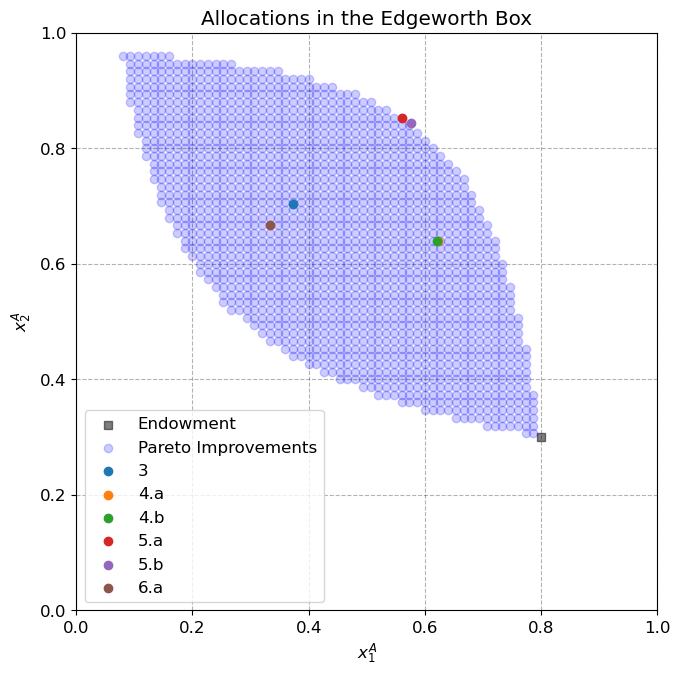

In [25]:
# Get the allocations from the class method
allocations = edgeworth_box.get_allocations()

# Plot the Edgeworth box with the allocations
edgeworth_box.plot_edgeworth_box_with_allocations(allocations)

# Question 7

In Question 7, we generate 50 random initial endowments for consumers A and B and visualizing these endowments. 

This is done in the following steps:
1. Define the class "RandomEndowments"
2. Generate random endowments 
3. Plot the random endownments 

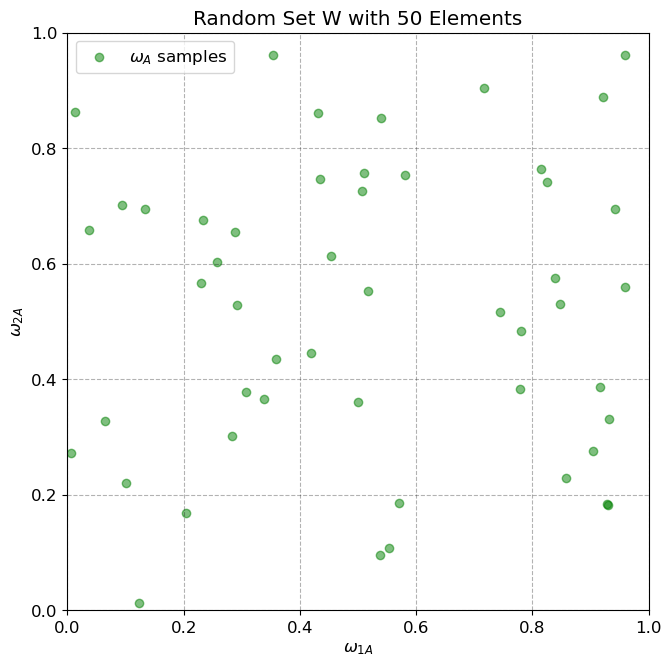

In [27]:
# Import the RandomEndowments class from the updated py file
from inauguralproject import RandomEndowments

# Initialize the model with given parameters
random_model = RandomEndowments()

# Generate random endowments
omega_A, omega_B = random_model.generate_random_endowments(seed=1993, num_samples=50)

# Plot the random endowments
random_model.plot_random_endowments(omega_A)

# Question 8

In Question 8. we aim to analyze the market equilibrium (eq.) allocations resulting from the random initial endownments for person A and B. By generation and plotting these random endownments, we can observe how different starting point affect the eq. state.

Steps to solve the exercise:
1. Import RandomEndownments
2. Define the market equilibrium function 
3. Plot the market equilibrium allocations 

The plot shows the initial endowments (green dots) and the corresponding equilibrium allocations (blue dots) in the Edgeworth Box. Each green dot represents a random initial endowment for consumer A, with consumer B receiving the complementary endowment. The blue dots illustrate the resulting equilibrium allocations, showing how the market adjusts to different starting points. The alignment of blue dots indicates the pattern of market equilibrium allocations, highlighting how the economy balances the distribution of goods between the two consumers. 

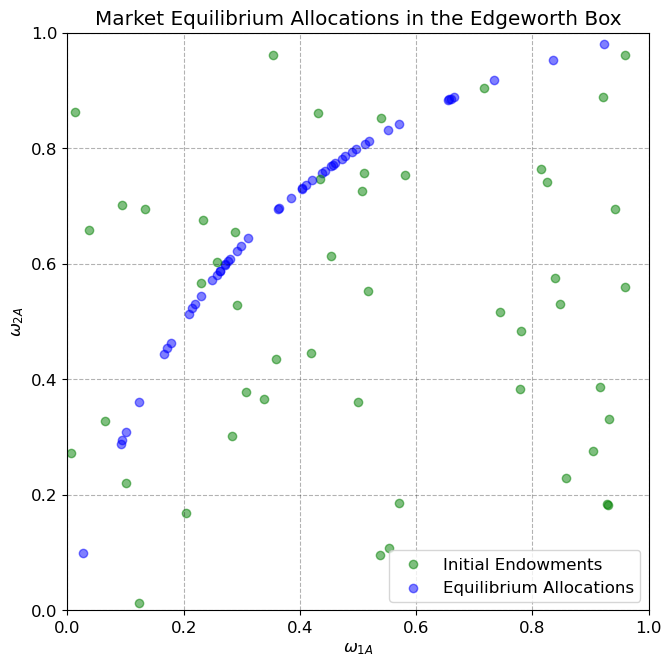

In [28]:
# Import the RandomEndowments class from the updated py file
from inauguralproject import RandomEndowments

# Initialize the model with given parameters
market_model = RandomEndowments()

# Generate random endowments
omega_A, omega_B = market_model.generate_random_endowments(seed=1993, num_samples=50)

# Plot the market equilibrium allocations
market_model.plot_market_equilibrium(omega_A)